# INTRODUCTION TO THE NOTEBOOK

## Aim

In this notebook, we will explore the principal characteristics of the linear regression models. This document is designed to emphasize technical details over the typical step-by-step procedure for implementing a regression model. Consequently, the organization of sections does not follow the traditional sequence. A complementary document will be provided, featuring a practical example to cover it thoroughly.

Please feel free to suggest any corrections, modifications, or improvements. **Your feedback is greatly appreciated**.

## Programming Language

The code in the following sections is developed using Python (v. 3.10.13). The versions of the packages used are:

* **Pandas**: '2.2.2' 
* **scikit-learn**: '1.2.2' 
* **Matplotlib**: '3.7.5'
* **Numpy**: '1.26.4'
* **Statsmodels**: '0.14.1'

In [61]:
import pandas as pd                                  # Read csv
from sklearn.linear_model  import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # interaction effect, no linear models
from sklearn.linear_model  import Ridge, RidgeCV, Lasso, LassoCV # regularizationy, best value of alpha Ridge, reduce features, best value of alpha Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.dummy import DummyRegressor
import matplotlib
from sklearn.preprocessing import StandardScaler # standardization
import matplotlib.pyplot as plt                  # plot
import numpy as np
import statsmodels.api as sm


# Check Python and packages version.
import sys
from sklearn import __version__ as sklearn_version # Only needed for sklearn

versions = {
    "Python": sys.version.split(" ")[0],  # Simplifying to just the version number
    "Pandas": pd.__version__,
    "scikit-learn": sklearn_version,
    "Matplotlib": matplotlib.__version__,
    "Numpy": np.__version__,
    "Statsmodels": sm.__version__
}

# print(versions)

## Database

Throughout this notebook, we will use the "Red Wine Quality" database. You can find a complete description of this dataset by following this link: [Red Wine Quality Dataset Description](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009).

* All the variable in this database are quantitative.
* The target variable is "quality", which ranges from 0 to 10.

Now, we are going to upload the data and separate target from features. There are two important things that this notebook ommit:

* Split data in training and test. 
* Explore and clean the data.
* Check the assumptions of the model.

You can see it in practise in the complementary example.




In [62]:
# Read csv and see the chaacteristics
df = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
print("Number of rows:", len(df))
print(df.head(5))

# Separate target and features:

df_target   = df[['quality']]      # Use doble [[ ]] to avoid transform in serie (because is only one column)
df_features = df.drop('quality', axis=1)

print("\n")
print("The compleate df has", len(df),          "cases and", df.shape[1],          "columns")
print("df_target has",        len(df_target),   "cases and", df_target.shape[1],   "column")
print("df_features has",      len(df_features), "cases and", df_features.shape[1], "columns")

Number of rows: 1599
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  

**Summary of the data**

We have 1,599 entries (cases,rows), one target variable ("quality") and 11 features.

# 1. Introduction to Linear Regression

Linear regression is a machine learning algorithm classified under "supervised learning" techniques.

The **aim** of linear regression algorithm is to predict one variable (VD, also known as *target* or *y*) using one or more features (VI, *predictors* or *$x_i$*).

There are two type of models depending on the number of features involve:

* **Simple Linear Regression**. The model only one feature to predict the target:

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \epsilon
$$

* **Multiple Linear Regression**. This model use two or more features to predict the target.

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 +  \hat{\beta}_2 x_2 + ... + \hat{\beta}_n x_n + \epsilon
$$

Where:

* $ \hat{y} $: Is the target we predict.
* $ \hat{\beta}_0 $: Is the *intercept* or *bias*.
* $ \hat{\beta}_1, \hat{\beta}_2, ... $: Are the *coefficients* (*weights*, *effect*) associated with each feature. Is the effect of one feature on the target.
* $ \epsilon $: Represents the error term.


**Note**: When discussing estimations (like parameter estimations or model residuals) or predictions, we use the hat notation, as in $\hat{y}$.

## A. Model 1: Simple Linear Regression Model

This model uses only one feature to predict the "quality" of the wine, which is our target variable stored in *df_target*. 


The predictor we will use is the "alcohol" level, currently housed within *df_features* along with other features. To simplify our analysis, we will first extract this specific feature into a new object dedicated solely to it.

In [63]:
# Select only the feature alcohol
df_feature_one = df_features[['alcohol']]

# Print results
print("Target quality \n", df_target.sort_index().head(5), "\n")
print("Feature alcohol \n", df_feature_one.sort_index().head(5))

Target quality 
    quality
0        5
1        5
2        5
3        6
4        5 

Feature alcohol 
    alcohol
0      9.4
1      9.8
2      9.8
3      9.8
4      9.4


Next, we'll construct the model to establish the relationship between "quality" and "alcohol" content. Here's the step-by-step process:

* **Create the model**. In this case, Linear Regression model.
* **Fit the model**. Train the model with our data. During this process, the model will adjust its parameters to best fit the relationship between quality and alcohol content. As a result, we'll obtain the coefficients and the intercept.
* **Display Coefficients and Intercept**: After fitting the model, we'll showcase the numerical values for the intercept and coefficients. These values provide insights into the baseline quality (intercept) and the magnitude of influence (coefficients) that alcohol content has on the quality of the product.

In [64]:
# Create SLRM and fit it
regression1 = LinearRegression()

# Fit the model
model1 = regression1.fit(df_feature_one.sort_index(),   # Features first then target
                         df_target.sort_index()) 

# Show the results (round to three decimals):
print("Intercept:",     model1.intercept_[0].round(3))
print("Coefficients :", model1.coef_[0][0].round(3))

Intercept: 1.875
Coefficients : 0.361


Whith this information, we can construct the equation of the model:

$$
\hat{y} = 1.875 + 0.361 · x_1 + \epsilon
$$

The error $ \epsilon $ epresents the disparity between the actual value of  $ y $ and the predicted value $ \hat{y} $. We can only ascertain this value when we possess the actual result, not during prediction.

Nevertheless, we can substitute the feature value into the equation. For our initial scenario, this value is:

In [65]:
print("Value of alcohol feature for our first case :", df_feature_one.iloc[0:1])

Value of alcohol feature for our first case :    alcohol
0      9.4


The equation for the first case is:

$$
\hat{y} = 1.875 + 0.361 · 9.4 
$$

So, the predicted value of our first case is:

$$
\hat{y} = 1.830 + 0.364 · 10 \approx 5.268
$$

We can achieve this using our script:

In [66]:
model1_y = pd.DataFrame(model1.predict(df_feature_one.sort_index()), 
                      index=df_feature_one.index, 
                      columns=['Simple Model'])

print("Quality predicted value for the frst case:", model1_y.sort_index().round(3).head(1))

Quality predicted value for the frst case:    Simple Model
0         5.267


Now, we are going to plot our model, putting in relation the predicted and real values of the "quality" of wine. The elements are:

* **x-axis**: Predicted value of the target.
* **y-axis**: Real value of the target.
* **Dots**: Represent each wine "quality" (predicted vs real). The more filled dots are, the more cases concentrated on that relation.
* **Predicted line**. Dashed red line. Represents the predictions if the model was perfect. The closer the dots to the line, the better predictions are made.
* **Axis limits**. Ranging between 0 to 10, which are the minimum and maximum theoretical values of the "quality".

The interpretation that we can make is:

* The real values of the target range between 3 and 9, while the predicted values range between 5 and 7 (approximately). So not all the variability is captured by the model.
* Dots are closer to the predicted line in the medium values. This means that our model is not good at predicting when the "quality" of wine is lower or higher. However, overall, the model doesn't predict very well.

You can see the code to make this plot and the output of it:

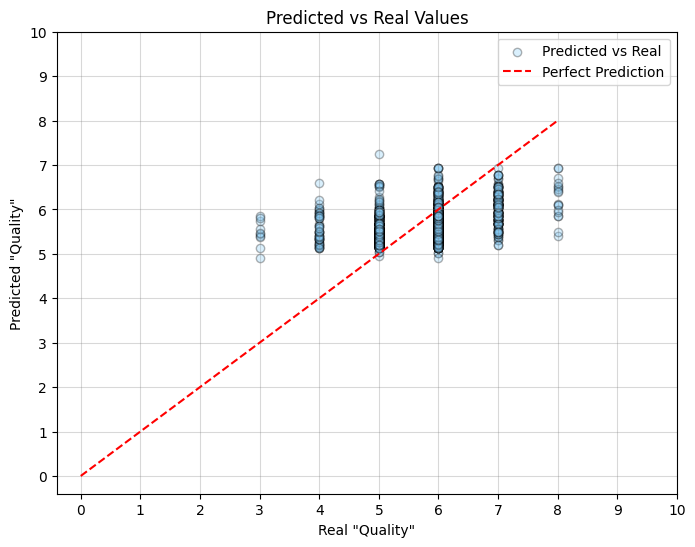

In [67]:
plt.figure(figsize=(8, 6))
plt.scatter(df_target.sort_index(),     # Real value
            model1_y.sort_index(),      # Predicted
            color='lightskyblue',
            edgecolor = "black",
            label='Predicted vs Real',
            alpha = 0.3)

# Plot a diagonal line representing perfect predictions and customize
max_val = max(np.max(df_target), np.max(model1_y))
plt.plot([0, max_val], [0, max_val], 
         color='red', 
         linestyle='--', 
         label='Perfect Prediction')

plt.xticks(np.arange(0,10+1, 1))
plt.yticks(np.arange(0,10+1, 1))
plt.xlabel('Real "Quality"')
plt.ylabel('Predicted "Quality"')
plt.title('Predicted vs Real Values')
plt.legend()
plt.grid(color = "gray",
         alpha = 0.3)
plt.show()

## B. Model 2: Multiple Linear Regression Model

This model uses more than one feature to predict the "quality" of the wine, which is our target variable stored in df_target.

The predictors we will use are all the available features (11 variables), storesd in df_features.

The steps are identical to those in model 1.

In [68]:
# Create MLRM and fit it
regression2 = LinearRegression()

# Fit the model
model2 = regression2.fit(df_features.sort_index(), 
                         df_target.sort_index()) 

# Show the equation values:
print("Intercept :",    model2.intercept_ [0].round(3))

coefficient_dict = dict(zip(df_features.columns,
                            model2.coef_[0]))
print("Coefficients :")
for feature, coef in coefficient_dict.items():
    print(f"{feature}: {coef:.3f}")

Intercept : 21.965
Coefficients :
fixed acidity: 0.025
volatile acidity: -1.084
citric acid: -0.183
residual sugar: 0.016
chlorides: -1.874
free sulfur dioxide: 0.004
total sulfur dioxide: -0.003
density: -17.881
pH: -0.414
sulphates: 0.916
alcohol: 0.276


Whith this information we can build the equation of the model:

$$
\hat{y} = 21.956 + 0.025 · x_1 - 1.084 · x_2 - 0.183 · x_3 + 0.016 · x_4 - 1.874 · x_5 + 0.004 · x_6 - 0.003 · x_7 - 17.881 · x_8 - 0.414 · x_9 + 0.916 · x_{10} + 0.276 · x_{11}
$$

We can see that we have negative and positive values in the coeficients. We interpret them as follows:

* **Positive**: A high value in that feature increases the value of the target.
* **Negative**: A high value in that feature decreases the value of the target.

If we replace the features for our first case, we obtain this:

In [69]:
print("Value of all features for our first case :", df_features.iloc[0:1].transpose().round(3))

Value of all features for our first case :                            0
fixed acidity          7.400
volatile acidity       0.700
citric acid            0.000
residual sugar         1.900
chlorides              0.076
free sulfur dioxide   11.000
total sulfur dioxide  34.000
density                0.998
pH                     3.510
sulphates              0.560
alcohol                9.400


For the first case the final equation looks like:

$$
\hat{y} = 21.956 + 0.025 · 7.4 - 1.084 · 0.7 - 0.183 · 0 + 0.016 · 1.9 - 1.874 · 0.076 + 0.004 · 11 - 0.003 · 34 - 17.881 · 0.998 - 0.414 · 3.510 + 0.916 · 0.560 + 0.276 · 9.4
$$

And the quality predicted value :

$$
\hat{y} \approx 5.021
$$

We can obtain this result using our script (discrepancies might be due to differences in decimal precision)

In [70]:
model2_y = pd.DataFrame(model2.predict(df_features.sort_index()), 
                        index=df_features.index, 
                        columns=['Multiple Model'])

print("Quality predicted value for the frst case:", model2_y.sort_index().round(3).head(1))

Quality predicted value for the frst case:    Multiple Model
0           5.033


As before, we represent the relation between prediction and real value using a plot. We plot the result from model 1 and model 2 side by side to compare both models.

There are no large differences between both models. Model 2 performe a slightly better than model 1. We can affirm that because the dots are more close to the red line in model 2 (look when real wine "quality" is 5).


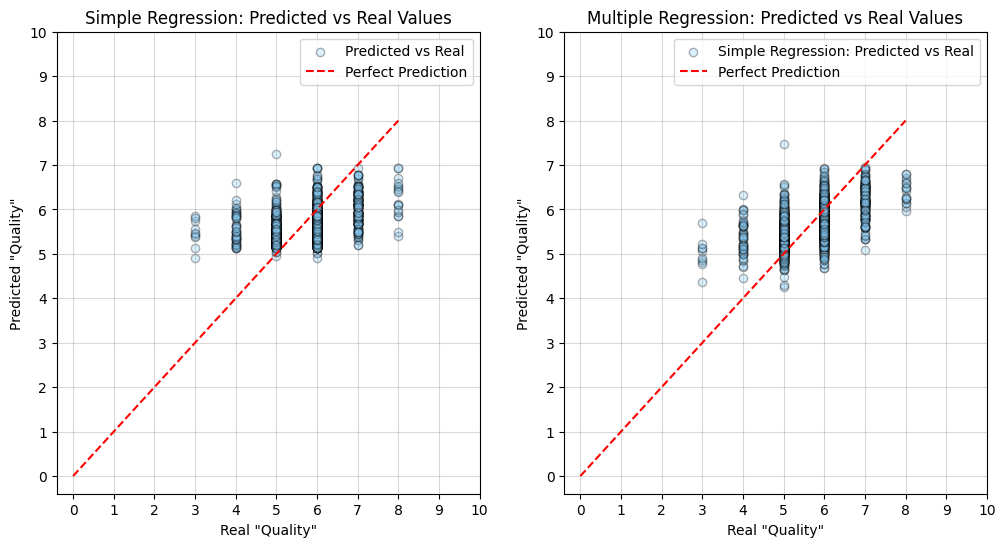

In [71]:
plt.figure(figsize=(12, 6))


# Plot model 1
plt.subplot(1, 2, 1)

plt.scatter(df_target.sort_index(),     # Real value
            model1_y.sort_index(),      # Predicted
            color='lightskyblue',
            edgecolor = "black",
            label='Predicted vs Real',
            alpha = 0.3)

# Plot a diagonal line representing perfect predictions and customize
max_val = max(np.max(df_target), np.max(model1_y))
plt.plot([0, max_val], [0, max_val], 
         color='red', 
         linestyle='--', 
         label='Perfect Prediction')

plt.xticks(np.arange(0,10+1, 1))
plt.yticks(np.arange(0,10+1, 1))
plt.xlabel('Real "Quality"')
plt.ylabel('Predicted "Quality"')
plt.title('Simple Regression: Predicted vs Real Values')
plt.legend()
plt.grid(color = "gray",
         alpha = 0.3)



# Plot model 2
plt.subplot(1, 2, 2)

plt.scatter(df_target.sort_index(),     # Real value
                model2_y.sort_index(),      # Predicted
                color='lightskyblue',
                edgecolor = "black",
                label='Simple Regression: Predicted vs Real',
                alpha = 0.3)

# Plot a diagonal line representing perfect predictions and customize
max_val = max(np.max(df_target), np.max(model2_y))
plt.plot([0, max_val], [0, max_val], 
         color='red', 
         linestyle='--', 
         label='Perfect Prediction')

plt.xticks(np.arange(0,10+1, 1))
plt.yticks(np.arange(0,10+1, 1))
plt.xlabel('Real "Quality"')
plt.ylabel('Predicted "Quality"')
plt.title('Multiple Regression: Predicted vs Real Values')
plt.legend()
plt.grid(color = "gray",
         alpha = 0.3)


plt.show()


# 2. Features modifications 

## A. Interacction effect

Sometimes, individual features may not exhibit a significant effect on the target variable by themselves, but their combination does. We can account for this type of effect by including an interaction term in the model.

Including interaction terms in the model allows for the possibility that the relationship between predictors and the target variable is not additive ($ \hat{\beta}_1 \cdot x_1 + \hat{\beta}_2 \cdot x_2 $), but varies depending on the levels of other predictors ($ \hat{\beta}_3 \cdot x_1 \cdot x_2 $).

Imagine we have an original model with two features: $x_1$ and $x_2$. As explained in the introduction, the model will take this form:

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \epsilon
$$

If we suspect there is an interaction between these two features, we can add the interaction effect as follows:

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \hat{\beta}_3 x_1 x_2 + \epsilon
$$

Some relevant points:

* We can include as many interaction effects as we want if they are interesting. However, we should consider the relevance of including them because we run the risk of overfitting our model.
* An interaction effect could involve more than two features. For example, ($ \hat{\beta}_3 · x_1 · x_2 · x_3 $). If you decide this is interesting in your case, be cautious about overfitting and the difficulty of interpreting the interaction.
* It is not necessary to include interactions for all the features involved in the model. If we have a model with three features and we think only the interaction between $ x_1 $ and $ x_2 $ is ineresting, then we can create a model like this: 

$$ 
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \hat{\beta}_3 x_3 + \hat{\beta}_4 x_1 x_2 + \epsilon 
$$

Now, let's learn how to implement this in Python.

As before, our target variable is "quality". For predictors, we'll include all the features, along with the interaction between "free sulfur dioxide" and "alcohol".

First, we'll create the interaction term:


In [72]:
interaction = PolynomialFeatures(
    degree=2,                    # How many features combinations we want to create
    include_bias=False,          # Exclude the bias term 
    interaction_only=True        # Only include interaction effects (not x^2, x^3, etc.)
    )

Now, we have to transform and fit the interaction between free sulfur dioxide and alcohol:

In [73]:
features_interaction = interaction.fit_transform(df_features[['free sulfur dioxide', 'alcohol']])

# This is not necessary but is good to see the results. Transform the array into a dataframe:
features_interaction = pd.DataFrame(features_interaction,
                                      columns = interaction.get_feature_names_out(['free sulfur dioxide', 'alcohol']),
                                      index=df_features.index  # This line ensures the index is carried over. Example, index 10 doesn´t should appear
                                   )
print(features_interaction.sort_index().head(1))


   free sulfur dioxide  alcohol  free sulfur dioxide alcohol
0                 11.0      9.4                        103.4


As we observed, the interaction term includes both the simple features (since degree = 2 encompasses degree = 1, which represents the simple effects) and the interaction itself. We are specifically interested in the interaction between "free sulfur dioxide" and "alcohol". Therefore, we extract only that column and add it to our original features DataFrame:

In [74]:
interaction_column = features_interaction[['free sulfur dioxide alcohol']].sort_index()
print(interaction_column.sort_index().head(5))

   free sulfur dioxide alcohol
0                        103.4
1                        245.0
2                        147.0
3                        166.6
4                        103.4


We add the interaction column to our original features DataFrame. To demonstrate that this DataFrame has been modified, we will create a new DataFrame to display the modified version.

In [75]:
df_features_interaction = df_features.join(interaction_column, how='outer')

print(df_features_interaction.sort_index().head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  free sulfur dioxide alcohol  
0      9.4                        103.4  
1 

Now, we have a new DataFrame with all the original features plus one additional column for the interaction term (which is the last column, "free sulfur dioxide alcohol").

**Important Note**: In this notebook, we are only utilizing the global database without splitting it into train and test sets. However, if we were to conduct such a split, the calculation of the interaction should be performed before splitting the data.

With our final DataFrame, df_features_interaction, we can proceed to fit the model and obtain the intercept and coefficients:

In [76]:
# Create MLRM and fit it
regression3 = LinearRegression()

# Fit the model
model3 = regression3.fit(df_features_interaction.sort_index(), 
                         df_target.sort_index()) # Features first then target

# Show the equation values:
print("Intercept :",    model3.intercept_[0].round(3))

coefficient_dict = dict(zip(df_features_interaction.columns,
                            model3.coef_[0]))
print("Coefficients :")
for feature, coef in coefficient_dict.items():
    print(f"{feature}: {coef:.3f}")

Intercept : 21.055
Coefficients :
fixed acidity: 0.024
volatile acidity: -1.082
citric acid: -0.170
residual sugar: 0.019
chlorides: -1.840
free sulfur dioxide: -0.018
total sulfur dioxide: -0.003
density: -16.610
pH: -0.420
sulphates: 0.903
alcohol: 0.245
free sulfur dioxide alcohol: 0.002


Now create the equation of the model:

$$
\hat{y} = 21.055 + 0.024 · x_1 - 1.082 · x_2 - 0.170 · x_3 + 0.019 · x_4 - 1.840 · x_5 - 0.018 · x_6 - 0.003 · x_7 - 16.610 · x_8 - 0.420 · x_9 + 0.903 · x_{10} + 0.245 · x_{11} + 0.002 · x_{6} · x_{11}
$$

If we substitute the features for our first case, we obtain the following:

In [77]:
# Notice that we use df_features_interaction
print("Value of all features for our first case :", df_features_interaction.iloc[0:1].transpose().round(3))

Value of all features for our first case :                                    0
fixed acidity                  7.400
volatile acidity               0.700
citric acid                    0.000
residual sugar                 1.900
chlorides                      0.076
free sulfur dioxide           11.000
total sulfur dioxide          34.000
density                        0.998
pH                             3.510
sulphates                      0.560
alcohol                        9.400
free sulfur dioxide alcohol  103.400


We replace with the features information:

$$
\hat{y} = 21.055 + 0.024 · 7.4 - 1.082 · 0.7 - 0.170 · 0 + 0.019 · 1.9 - 1.840 · 0.076 - 0.018 · 11 - 0.003 · 34 - 16.610 · 0.998 - 0.420 · 3.510 + 0.903 · 0.560 + 0.245 · 9.4 + 0.002 · 103.4 \approx 5.036
$$

Using Python:

In [78]:
model3_y = pd.DataFrame(model3.predict(df_features_interaction.sort_index()), 
                        index=df_features_interaction.index, 
                        columns=['Interaction Model'])

print("Quality predicted value for the frst case:", model3_y.sort_index().round(3).head(1))

Quality predicted value for the frst case:    Interaction Model
0               5.04


We are set to examine the relationship between the actual "quality" and the predicted "quality" of our model. We include two plots with two models: multiple regresion and interaction. Both include the 11 original features, but the second model also incorporates an interaction term. Despite these differences in model configuration, our findings indicate that there are no discernible differences in their predictions.

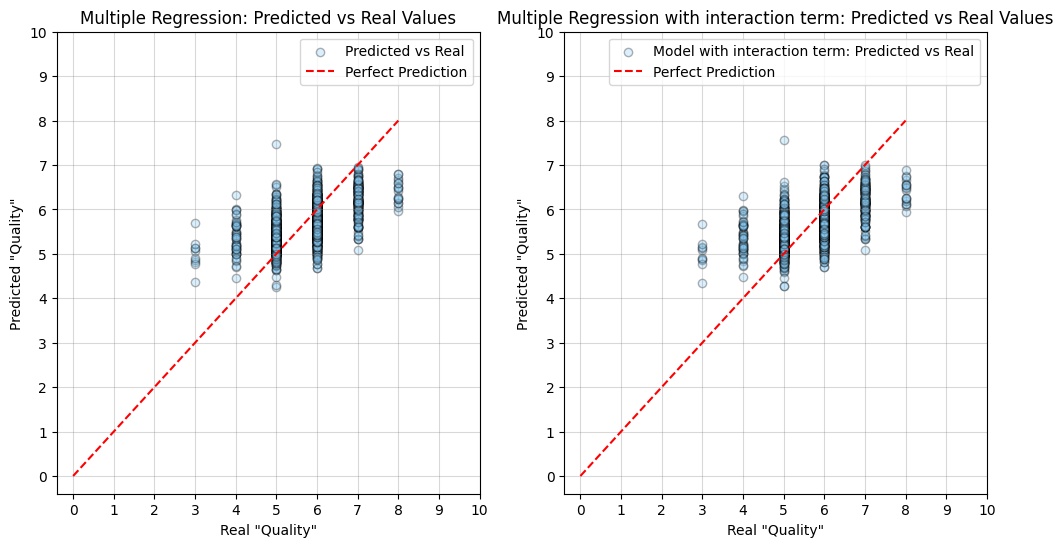

In [79]:
plt.figure(figsize=(12, 6))


# Plot model 2
plt.subplot(1, 2, 1)

plt.scatter(df_target.sort_index(),     # Real value
            model2_y.sort_index(),      # Predicted
            color='lightskyblue',
            edgecolor = "black",
            label='Predicted vs Real',
            alpha = 0.3)

# Plot a diagonal line representing perfect predictions and customize
max_val = max(np.max(df_target), np.max(model1_y))
plt.plot([0, max_val], [0, max_val], 
         color='red', 
         linestyle='--', 
         label='Perfect Prediction')

plt.xticks(np.arange(0,10+1, 1))
plt.yticks(np.arange(0,10+1, 1))
plt.xlabel('Real "Quality"')
plt.ylabel('Predicted "Quality"')
plt.title('Multiple Regression: Predicted vs Real Values')
plt.legend()
plt.grid(color = "gray",
         alpha = 0.3)



# Plot model 3
plt.subplot(1, 2, 2)

plt.scatter(df_target.sort_index(),     # Real value
                model3_y.sort_index(),      # Predicted
                color='lightskyblue',
                edgecolor = "black",
                label='Model with interaction term: Predicted vs Real',
                alpha = 0.3)

# Plot a diagonal line representing perfect predictions and customize
max_val = max(np.max(df_target), np.max(model3_y))
plt.plot([0, max_val], [0, max_val], 
         color='red', 
         linestyle='--', 
         label='Perfect Prediction')

plt.xticks(np.arange(0,10+1, 1))
plt.yticks(np.arange(0,10+1, 1))
plt.xlabel('Real "Quality"')
plt.ylabel('Predicted "Quality"')
plt.title('Multiple Regression with interaction term: Predicted vs Real Values')
plt.legend()
plt.grid(color = "gray",
         alpha = 0.3)


plt.show()

## B. Nonlinear relationships

In linear models, we typically expect the relationship between the target and features to be constant. However, when this assumption doesn't hold true, the relationship is deemed nonlinear. For instance, consider a student preparing for an exam. Generally, more hours of study lead to higher scores. However, this relationship is not linear. Spending one hour studying doesn't necessarily result in a score of one on the test, nor does studying for seven hours guarantee a score of seven. Instead, the relationship between the target ("score") and the feature ("number of hours of study") is exponential.

A model that incorporates a nonlinear effect in a feature accounts for this aspect:

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 +  \hat{\beta}_2 x_1^2 + ... + \hat{\beta}_n x_n + \epsilon
$$

Where:

* $ x_1 $: Represents the feature with a linear effect.
* $ x_1^2 $: Represents the same feature with a nonlinear association. The exponent $ ^2 $ indicates the polynomial degree.

**Include only nonlinear relationshiph or both?**:

If you believe that the relationship between a feature and the target variable is purely nonlinear, then you might only include the nonlinear term in your model. However, in many cases, including both linear and nonlinear terms can provide a more flexible and accurate representation of the relationship.
Additionally, including both linear and nonlinear terms can help prevent issues like omitted variable bias, where failing to include relevant variables in the model leads to biased and inconsistent parameter estimates.



The approach (Python) is similar to that of incorporating interaction effects. We will create the complete model, including nonlinear effect for the sulfite feature and then create and fit the model.
We begin by creating a new feature $ sulphite^2 $, which represents the square of the sulfite feature. This is essentially an interaction between the same feature.



In [80]:
polynomial = PolynomialFeatures(
    degree=2,                    # We need a interaction with two degrees.
    include_bias=False,          # Exclude the bias term 
    interaction_only=False       # NEW. Include polynomia effects. In our case only x^2 because we are interesting in 2 degrees.
    )

Now, we have to transform and fit the polynomial effect of "sulphates":

In [81]:
polynomial_features = polynomial.fit_transform(df_features[['sulphates']].sort_index())

# This is not necessary but is good to see the results. Transform the array into a dataframe:
features_polynomial = pd.DataFrame(polynomial_features,
                                   columns = polynomial.get_feature_names_out(),
                                   index=df_features.index  # This line ensures the index is carried over. Example, index 10 doesn´t should appear
                                   )
print(features_polynomial.sort_index().head(1))

   sulphates  sulphates^2
0       0.56       0.3136


We only need incorporate the $ sulphates^2 $ column. First, we isolete that column and then we add it to the original feature df (we create a new dataframe for this new data)

In [82]:
# Isolate the polynomial feature
polynomial_column = features_polynomial[['sulphates^2']].sort_index()

# Add to the other features (and create a new features df)
df_features_polynomial = df_features.join(polynomial_column, how='outer')
print(df_features_polynomial.sort_index().head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  sulphates^2  
0      9.4       0.3136  
1      9.8       0.4624  
2      9

**ImportantNote**. As we say in the interaction section, if we are going to split the data into training and testing, then this steps should be done before.

With our final DataFrame, df_features_polynomial, we can proceed to fit the model and obtain the intercept and coefficients:

In [83]:
# Create MLRM and fit it
regression4 = LinearRegression()

# Fit the model
model4 = regression4.fit(df_features_polynomial.sort_index(), 
                         df_target.sort_index()) # Features first then target

# Show the equation values:
print("Intercept :",    model4.intercept_[0].round(3))

coefficient_dict = dict(zip(df_features_polynomial.columns,
                            model4.coef_[0]))
print("Coefficients :")
for feature, coef in coefficient_dict.items():
    print(f"{feature}: {coef:.3f}")

Intercept : 32.52
Coefficients :
fixed acidity: 0.013
volatile acidity: -0.967
citric acid: -0.214
residual sugar: 0.017
chlorides: -1.599
free sulfur dioxide: 0.003
total sulfur dioxide: -0.003
density: -28.532
pH: -0.662
sulphates: 3.640
alcohol: 0.260
sulphates^2: -1.565


Now build the equation of the model:

$$
\hat{y} = 32.52 + 0.013 · x_1 - 0.967 · x_2 - 0.214 · x_3 + 0.017 · x_4 -1.599 · x_5 + 0.003 · x_6 - 0.003 · x_7 - 28.532 · x_8 - 0.662 · x_9 + 3.640 · x_{10} + 0.260 · x_{11} - 1.565 · x_{10}^2
$$

Observing the polynomial coefficient, it becomes evident that it's negative. This signifies that as the levels of" sulfates" increase, the "quality" of the wine tends to decrease. Given its polynomial nature, this decline in "quality" accelerates, indicating a rapid deterioration with higher "sulfates".

Upon substituting the features in our initial case, the resultant trend emerges as follows:

In [84]:
# Notice that we use df_features_interaction
print("Value of all features for our first case :", df_features_polynomial.iloc[0:1].transpose().round(3))

Value of all features for our first case :                            0
fixed acidity          7.400
volatile acidity       0.700
citric acid            0.000
residual sugar         1.900
chlorides              0.076
free sulfur dioxide   11.000
total sulfur dioxide  34.000
density                0.998
pH                     3.510
sulphates              0.560
alcohol                9.400
sulphates^2            0.314


We replace our model with the features information case one:

$$
\hat{y} = 32.52 + 0.013 · 7.4 - 0.967 · 0.7 - 0.214 · 0 + 0.017 · 1.9 -1.599 · 0.076 + 0.003 · 11 - 0.003 · 34 - 28.532 · 0.998 - 0.662 · 3.510 + 3.640 · 0.560 + 0.260 · 9.4 - 1.565 · 0.314 \approx 4.973
$$

Using Python:

In [85]:
model4_y = pd.DataFrame(model4.predict(df_features_polynomial.sort_index()), 
                      index=df_features_polynomial.index, 
                      columns=['Polinomyal Model'])

print("Quality predicted value for the frst case:", model4_y.sort_index().head(1))

Quality predicted value for the frst case:    Polinomyal Model
0          4.988998


We create again the two plots: multiple regression and regression with polynomical term. Again, no differences are detected.

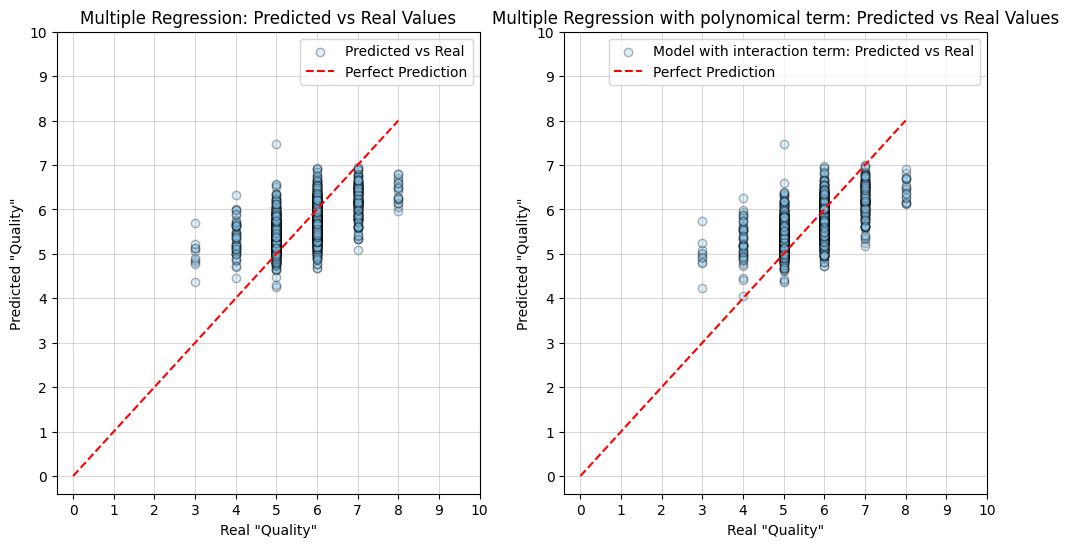

In [86]:
plt.figure(figsize=(12, 6))


# Plot model 2
plt.subplot(1, 2, 1)

plt.scatter(df_target.sort_index(),     # Real value
            model2_y.sort_index(),      # Predicted
            color='lightskyblue',
            edgecolor = "black",
            label='Predicted vs Real',
            alpha = 0.3)

# Plot a diagonal line representing perfect predictions and customize
max_val = max(np.max(df_target), np.max(model1_y))
plt.plot([0, max_val], [0, max_val], 
         color='red', 
         linestyle='--', 
         label='Perfect Prediction')

plt.xticks(np.arange(0,10+1, 1))
plt.yticks(np.arange(0,10+1, 1))
plt.xlabel('Real "Quality"')
plt.ylabel('Predicted "Quality"')
plt.title('Multiple Regression: Predicted vs Real Values')
plt.legend()
plt.grid(color = "gray",
         alpha = 0.3)



# Plot model 4
plt.subplot(1, 2, 2)

plt.scatter(df_target.sort_index(),     # Real value
                model4_y.sort_index(),      # Predicted
                color='lightskyblue',
                edgecolor = "black",
                label='Model with interaction term: Predicted vs Real',
                alpha = 0.3)

# Plot a diagonal line representing perfect predictions and customize
max_val = max(np.max(df_target), np.max(model4_y))
plt.plot([0, max_val], [0, max_val], 
         color='red', 
         linestyle='--', 
         label='Perfect Prediction')

plt.xticks(np.arange(0,10+1, 1))
plt.yticks(np.arange(0,10+1, 1))
plt.xlabel('Real "Quality"')
plt.ylabel('Predicted "Quality"')
plt.title('Multiple Regression with polynomical term: Predicted vs Real Values')
plt.legend()
plt.grid(color = "gray",
         alpha = 0.3)


plt.show()

# 3. Optimization Techniques

Scikit-learn offers a wide array of estimator options, covering various techniques beyond regression. The image below illustrates the extensive variety included in this package. For more details, you can explore [Scikit-learn estimators](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

<div style="text-align:center">
    <img src="https://scikit-learn.org/stable/_static/ml_map.png" alt="Scikit-Learn estimators" width="700" height="500">
</div>

<br>

**Optimization algorithms** are tools used to find the best solution to a problem, typically aiming to minimize or maximize a function. Key concepts include:

* **Objective Function**: The function we aim to optimize.
* **Minimum and Maximum**: We seek the minimum when optimizing parameters to minimize error and the maximum when maximizing profits.
* **Stopping Conditions**: Criteria indicating when to cease the search for the optimal solution. For instance, fixed iteration counts or when improvements in the objective function fall below a specific threshold.
* **Optimal Point**: The input value yielding the minimum or maximum of the objective function.
* **Gradient**: A vector indicating both the direction and magnitude of the steepest change in a function.

<br>

## A. Residual Sum of Squares (RSS)

The **Residual Sum of Squares (RSS)** serves as a metric to compute differences between real and estimated values. It's calculated using the formula:

$$
RSS = \sum_{i=1}^{n} ( y_i - \hat{y}_i )^2
$$

Where:

* i: Denotes a specific row.
* n: Represents the total sample.
* $y_i$ : Refers to the real value of the target.
* $\hat{y}_i$: Refers to the estimated value of the target.

Regularization model includes some penalization into this RSS.

<br>

### a. Ordinary Least Square (OLS)

**Ordinary Least Squares (OLS)** is a method employed to minimize the sum of the squared errors, which represent the differences between predictions and actual values.

* Usefull when the errors follows a normal distribution and there are no outliers in the data.
* OLS is widely used in linear regression analysis to estimate the coefficients of the linear equation that best fits the observed data points. It provides a "best fit" line through the data by determining the coefficients that minimize the sum of the squared residuals.

<br>
<br>

## B. Gradient Descent

**Gradient Descent** is an iterative optimization process used to find the optimal parameters of a model.

* Is an iterative process. It repeatedly updates the parameters until convergence to minimize the loss function.
* Use the enterie sample in each iteration to update parameters.
* Parameter are update in the oposite direction of the gradient of the loss function.
* Search the local or global minimun.
* While Gradient Descent might be slower than certain methods for simple linear regression problems, it offers more flexibility and is particularly useful for complex problems with non-linear relationships.

<br>
<br>
## C. SGD Regressor (Stochastic Gradient Descent)

**Stochastic Gradient Descent (SGD)** is a variant of Gradient Descent used in machine learning. It seeks to minimize the loss function to update the model parameters.

* Search for the minimun to update the model parameters.
* Use when you have large samples.
* Unlike traditional Gradient Descent, SGD utilizes a random sample of the data in each iteration. This characteristic makes it efficient for large training samples, as it processes smaller batches of data at a time.

<br>
<br>

## D. Regularization

Regularization methods are used to prevent overfitting by adding a penalty term to the loss function. This penalty term encourages the model to learn simpler patterns and helps prevent it from fitting noise in the training data. By optimizing both the original loss function and the regularization term, regularization techniques strike a balance between fitting the training data well and generalizing to unseen data, thus improving the overall performance of the model

**Differences between Lasso and Ridge Regression**:

| | Ridge Regression (L2) | Lasso Regression (L1)|
|:--:| :--:|:--:|
|Penalty term| Proportional to the square of the square of the magnitude of the coefficients: $ \Theta^2 $ | Proportional to the absolute value of the coefficients $ |\Theta| $. It could drive some coefficients to 0|
|Objetive| Reduces overfitting and model complexity| Reduces complexity and automatically selects some features (by setting their coefficients to 0. In other words, deleting it)|
|Predictions| Generally yields better predictions| More interpretable due to feature selection|

**$\alpha$**: Hiperparameter that controls how much is going to be penalize. Higher the value, simpler the models. To select the best value, a tuning process must be done. **WARNING** in Lasso, if we pick a large value we can deleate a lot of features because their coefficients will go to 0.

<br>

### a. Ridge Regression (L2)

When to use it:
* High correlation among features.
* Number of features > number of observations (overdimensional models)
* When aiming to reduce overfitting while maintaining multicollinearity.

This model penalizes as follows:

$$
RSS + \alpha ·  \sum_{j=1}^{p} (\hat{\beta} _j )^2
$$

Where:

* j: Represent a specific feature.
* p: Denotes total number of features.
* $\beta$: Denotes the coeficient of the feature.
* $\alpha$: Represent the hiperparameter.

<br>

### b. Lasso Regression (L1)

This model penalizes as follow:

$$
\frac{1}{2n}· RSS + \alpha ·  \sum_{j=1}^{p} |\hat{\beta}_j|
$$

Where:

* j: Denotes a specific feature.
* p: Represents the total number of features.
* $\beta$: Represents the coeficient of the feature.
* $\alpha$: Denotes the hiperparameter.
* n: Represents the number of obervations.

<br>

### c. Elastic Net

Combines the penalties of both Lasso (L1) and Ridge (L2) regression. It aims to overcome the limitations of each method individually by incorporating their strengths.

In Elastic Net, the loss function is augmented with two penalty terms: one that is proportional to the absolute values of the coefficients (L1 penalty), and another that is proportional to the square of the coefficients (L2 penalty). The objective of Elastic Net is to find a balance between feature selection (like Lasso) and parameter shrinkage (like Ridge).

Elastic Net is particularly useful when dealing with datasets where there are multiple correlated features, as it can select groups of correlated features together, unlike Lasso which tends to arbitrarily select only one feature from a group.

The Elastic Net hyperparameters include $\alpha$, controlling the overall strength of regularization, and the mixing parameter $\rho$, determining the balance between L1 and L2 penalties.

  <br>
  <br>
  <br>
        
We are going to investigate the regularization options in Python starting with **Ridge Regression**.
First of all, we select different values for the hiperparameter $\alpha$.

In [87]:
# Create the model with different values for alpha
ridge_parameters = RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100])

Now we fit the model and see what is the best value for $\alpha$

In [88]:
# Fit the model
model5 = ridge_parameters.fit(df_features.sort_index(), 
                              df_target.sort_index())

# Show alpha, intercept value ,and coefficients:
print("Coefficients :", model5.alpha_)
print("Intercept :", model5.intercept_ [0].round(3))

coefficient_dict = dict(zip(df_features.columns,
                            model5.coef_[0]))
print("Coefficients :")
for feature, coef in coefficient_dict.items():
    print(f"{feature}: {coef:.3f}")

Coefficients : 0.1
Intercept : 4.574
Coefficients :
fixed acidity: 0.009
volatile acidity: -1.099
citric acid: -0.187
residual sugar: 0.009
chlorides: -1.830
free sulfur dioxide: 0.005
total sulfur dioxide: -0.003
density: -0.165
pH: -0.495
sulphates: 0.883
alcohol: 0.293


As we see, alpha take a optimal value of 0.1.

Now build the equation of the model:

$$
\hat{y} = 4.574 + 0.009 · x_1 -1.099 · x_2 - 0.187 · x_3 + 0.009 · x_4 - 1.830 · x_5 + 0.005 · x_6 - 0.003 · x_7 - 0.165 · x_8 - 0.495 · x_9 + 0.883 · x_{10} + 0.293 · x_{11} 
$$

If we substitute the features for our first case, we obtain the following:

In [89]:
print("Value of all features for our first case :", df_features.sort_index().iloc[0:1].transpose().round(3)) 

Value of all features for our first case :                            0
fixed acidity          7.400
volatile acidity       0.700
citric acid            0.000
residual sugar         1.900
chlorides              0.076
free sulfur dioxide   11.000
total sulfur dioxide  34.000
density                0.998
pH                     3.510
sulphates              0.560
alcohol                9.400


We replace the $x$ variables with the features information:

$$
\hat{y} = 4.574 + 0.009 · 7.4 -1.099 · 0.7 - 0.187 · 0 + 0.009 · 1.9 - 1.830 · 0.076 + 0.005 · 11 - 0.003 · 34 - 0.165 · 0.998 - 0.495 · 3.51 + 0.883 · 0.56 + 0.293 · 9.4 \approx 5.049
$$

If we compute in python:

In [90]:
model5_y = pd.DataFrame(model5.predict(df_features.sort_index()), 
                      index=df_features.index, 
                      columns=['Ridge Model'])

print("Quality predicted value for the frst case:", model5_y.sort_index().head(1))

Quality predicted value for the frst case:    Ridge Model
0     5.038231


Now, we a build the model following the **Lasso Regression**. The steps to follow are the same as in Ridge Regression. So first of all, we select the optimal value of alpha and then we fix the model.

In [91]:
# Create the model with different values for alpha
lasso_parameters = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100])

# Fit the model
model6 = lasso_parameters.fit(df_features.sort_index(), 
                              df_target.sort_index().values.ravel()) # With Lasso scikit learn forces us to use an array (1-D)

# Show alpha, intercept value ,and coefficients:
print("Alpha :", model6.alpha_)
print("Intercept :", model6.intercept_.round(3))

coefficient_dict = dict(zip(df_features.columns,
                            model6.coef_))
print("Coefficients :")
for feature, coef in coefficient_dict.items():
    print(f"{feature}: {coef:.3f}")

Alpha : 0.001
Intercept : 3.903
Coefficients :
fixed acidity: 0.013
volatile acidity: -1.075
citric acid: -0.115
residual sugar: 0.006
chlorides: -1.248
free sulfur dioxide: 0.005
total sulfur dioxide: -0.003
density: -0.000
pH: -0.364
sulphates: 0.786
alcohol: 0.296


As we can see, here the best alpha of those we have proposed is 0.001. Now, the "density" coefficient drops to 0 which means that this characteristic doesn't affect the predictions. If we build the model's equation we obtain:

$$
\hat{y} = 3.903 + 0.013 · x_1 -1.075 · x_2 - 0.115 · x_3 + 0.006 · x_4 - 1.248 · x_5 + 0.005 · x_6 - 0.003 · x_7 - 0.000 · x_8 - 0.364 · x_9 + 0.786 · x_{10} + 0.296 · x_{11} 
$$


If we replace the features for our first case we obtain this:

In [92]:
print("Value of all features for our first case :", df_features.sort_index().iloc[0:1].transpose().round(3))

Value of all features for our first case :                            0
fixed acidity          7.400
volatile acidity       0.700
citric acid            0.000
residual sugar         1.900
chlorides              0.076
free sulfur dioxide   11.000
total sulfur dioxide  34.000
density                0.998
pH                     3.510
sulphates              0.560
alcohol                9.400


In the equation:

$$
\hat{y} = 3.903 + 0.013 · 7.4 -1.075 · 0.7 - 0.115 · 0 + 0.006 · 1.9 - 1.248 · 0.076 + 0.005 · 11 - 0.003 · 34 - 0.000 · 0.998 - 0.364 · 3.510 + 0.786 · 0.560 + 0.296 · 9.4  \approx 5.061
$$

In Python we obtain a similar value:

In [93]:
model6_y = pd.DataFrame(model6.predict(df_features.sort_index()), 
                        index=df_features.index, 
                        columns=['Lasso Model'])

print("Quality predicted value for the frst case:", model6_y.sort_index().round(3).head(1))

Quality predicted value for the frst case:    Lasso Model
0        5.047


Now, we are going to draw a scatter plot with the differences between the actual value of "quality" and the predicted values comparing three models: Multiple Linear Regression, Ridge Regression, and Lasso Regression.

No large differences are shown between the three models.

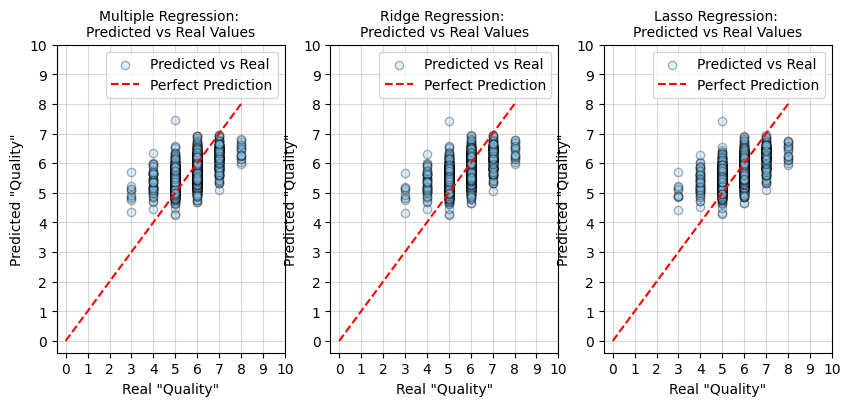

In [94]:
plt.figure(figsize=(10, 4))


# Plot model 2
plt.subplot(1, 3, 1)

plt.scatter(df_target.sort_index(),     # Real value
            model2_y.sort_index(),      # Predicted
            color='lightskyblue',
            edgecolor = "black",
            label='Predicted vs Real',
            alpha = 0.3)

# Plot a diagonal line representing perfect predictions and customize
max_val = max(np.max(df_target), np.max(model1_y))
plt.plot([0, max_val], [0, max_val], 
         color='red', 
         linestyle='--', 
         label='Perfect Prediction')

plt.xticks(np.arange(0,10+1, 1))
plt.yticks(np.arange(0,10+1, 1))
plt.xlabel('Real "Quality"')
plt.ylabel('Predicted "Quality"')
plt.title('Multiple Regression: \nPredicted vs Real Values', fontsize=10)
plt.legend()
plt.grid(color = "gray",
         alpha = 0.3)


# Plot model 5
plt.subplot(1, 3, 2)

plt.scatter(df_target.sort_index(),     # Real value
                model5_y.sort_index(),      # Predicted
                color='lightskyblue',
                edgecolor = "black",
                label='Predicted vs Real',
                alpha = 0.3)

# Plot a diagonal line representing perfect predictions and customize
max_val = max(np.max(df_target), np.max(model5_y))
plt.plot([0, max_val], [0, max_val], 
         color='red', 
         linestyle='--', 
         label='Perfect Prediction')

plt.xticks(np.arange(0,10+1, 1))
plt.yticks(np.arange(0,10+1, 1))
plt.xlabel('Real "Quality"')
plt.ylabel('Predicted "Quality"')
plt.title('Ridge Regression: \nPredicted vs Real Values', fontsize=10)
plt.legend()
plt.grid(color = "gray",
         alpha = 0.3)

# Plot model 6
plt.subplot(1, 3, 3)

plt.scatter(df_target.sort_index(),     # Real value
                model6_y.sort_index(),      # Predicted
                color='lightskyblue',
                edgecolor = "black",
                label='Predicted vs Real',
                alpha = 0.3)

# Plot a diagonal line representing perfect predictions and customize
max_val = max(np.max(df_target), np.max(model6_y))
plt.plot([0, max_val], [0, max_val], 
         color='red', 
         linestyle='--', 
         label='Perfect Prediction')

plt.xticks(np.arange(0,10+1, 1))
plt.yticks(np.arange(0,10+1, 1))
plt.xlabel('Real "Quality"')
plt.ylabel('Predicted "Quality"')
plt.title('Lasso Regression: \nPredicted vs Real Values', fontsize=10)
plt.legend()
plt.grid(color = "gray",
         alpha = 0.3)

plt.show()

# 4. Quantiy the fit

## A. Coefficient of determination $R^2$

**Definition**: "Proportion of target varianze that could be predict using the targets".

This coefficient is used to compare the efficiency of different models and determine which of them fits the observate data better.

The formula is as follow:

$$
R^2 = 1 - \frac{SS_{res}}{SS_{total}}
$$

* Residual Sum Square ($SS_{res}$): 

$$
SS_{res} = \sum(y_i - \hat{y_i})^2
$$

* Total Sum Square ($SS_{total}$): 

$$
SS_{total} = \sum(y_i - \bar{y_i})^2
$$

<br>

The **nomenclature** used in these formulas:

* $y_i$: Real values of the target.
* $\hat{y_i}$: Target values predicted by the model.
* $\bar{y_i}$: Mean of the real values ($y_i$).

<br>

**Interpretation**:

* $R^2$ = 1. The model is perfect. The features explain all the variability of the target. The residues are minimus.
* $R^2$ = 0. The model doesn't explain the variability in the data. It's not more useful than using the mean of the data as a predictor of each observation.
* $R^2$ < 0. The model performance worse than using simply the mean.

<br>

**Characteristics**:

* Although it is rare, the model could be worse than use only the mean.

* When the prediction residuals have a zero mean, the score is identical to the Explained Variance score.

We are going to explore the models that we generate in previous steps:

In [96]:
# Sort by index
df_target = df_target.sort_index()
model1_y = model1_y.sort_index()
model2_y = model2_y.sort_index()
model3_y = model3_y.sort_index()
model4_y = model4_y.sort_index()
model5_y = model5_y.sort_index()
model6_y = model6_y.sort_index()

# Ensure all preidctions and real observations has the same index:
assert df_target.index.equals(model1_y.index), "Indices do not match"
assert df_target.index.equals(model2_y.index), "Indices do not match"
assert df_target.index.equals(model3_y.index), "Indices do not match"
assert df_target.index.equals(model4_y.index), "Indices do not match"
assert df_target.index.equals(model5_y.index), "Indices do not match"
assert df_target.index.equals(model6_y.index), "Indices do not match"
print("Indices match successfully!")

predictions = pd.DataFrame({
    'Actual Target': np.squeeze(df_target), # Real values
    'Simple Model': np.squeeze(model1_y),
    'Multiple Model': np.squeeze(model2_y),
    'Interaction Model': np.squeeze(model3_y),
    'Polynomial Model': np.squeeze(model4_y),
    'Ridge Model': np.squeeze(model5_y),
    'Lasso Model': np.squeeze(model6_y),
})

print(predictions.head())

Indices match successfully!
   Actual Target  Simple Model  Multiple Model  Interaction Model  \
0              5      5.266887        5.032850           5.040084   
1              5      5.411224        5.137880           5.126022   
2              5      5.411224        5.209895           5.209883   
3              6      5.411224        5.693858           5.693117   
4              5      5.266887        5.032850           5.040084   

   Polynomial Model  Ridge Model  Lasso Model  
0          4.988998     5.038231     5.046736  
1          5.292153     5.141132     5.117490  
2          5.315795     5.215449     5.198441  
3          5.639909     5.680801     5.687292  
4          4.988998     5.038231     5.046736  


Now we are going to calculate the $R^2$ coefficient:

In [97]:
r2_scores = {}
r2_scores['Simple Model'] = r2_score(predictions['Actual Target'], predictions['Simple Model'])
r2_scores['Multiple Model'] = r2_score(predictions['Actual Target'], predictions['Multiple Model'])
r2_scores['Interaction Model'] = r2_score(predictions['Actual Target'], predictions['Interaction Model'])
r2_scores['Polynomial Model'] = r2_score(predictions['Actual Target'], predictions['Polynomial Model'])
r2_scores['Ridge Model'] = r2_score(predictions['Actual Target'], predictions['Ridge Model'])
r2_scores['Lasso Model'] = r2_score(predictions['Actual Target'], predictions['Lasso Model'])

# Print the R2 scores
for model, score in r2_scores.items():
    print(f"R2 score for {model}: {score:.4f}")


R2 score for Simple Model: 0.2267
R2 score for Multiple Model: 0.3606
R2 score for Interaction Model: 0.3613
R2 score for Polynomial Model: 0.3804
R2 score for Ridge Model: 0.3603
R2 score for Lasso Model: 0.3588


We can see that the model that includes all the features plus the polynomial effect of "sulphite" is the one that performs better. The model that performs the worst is the simple regression model, where predictions are made only with "alcohol" information.

## B. Adjusted coefficient of determination $R^2$

**Why use it?**: When we add more predictiors to the model, $R^2$ always increase (or at least doesn´t decrease). The problem is that adjusted is not as inerpretable as $R^2$.

Formula looks like follows:

$$
R^2 = 1 - \left( \frac{SS_{\text{res}}}{SS_{\text{total}}} \right) \cdot \left( \frac{N-1}{N-K-1} \right)
$$

Where:

* $SS_{\text{res}}$ and $SS_{\text{total}}$ are the same as in $R^2$.
* **N**: Number of observations in the data.
* **K**: Number of features used in the model (excluding the intercept).

The second part of the formula is the part that adjust for Degrees of Freedom.

<br>
<br>
<br>

# 5. Hypothesis tests

Two aproximations:

* A. See if the model proposed is better than the null model.
* B. Test if a particular coefficient is statistical different from 0

# 5. Hypothesis tests

Two aproximations:

* A. See if the proposed model is better than the null model.
* B. Test if a particular coefficient is statisticaly different from 0.

## A. Compare with the null model

The null model (baseline model) is the one that doesn't use any feature to predict the target.

The null hypothesis says that there is no relation between the features and the target.

**Null model**: Consist of a model that predict using only the mean or the median.

$$
\hat{y_i} = \bar{y_i}:
$$

Where:

* $\hat{y_i}$: Prediction.
* $\bar{y_i}$: Mean of the target values in the training set.

We can follow three strategies:

### a. Difference in $R^2$

Compare the values of the coefficient of determination between the null model and an alternative model. Following this, we can know which model works better, but we cannot ensure if one works significatilly better than the other. 

### b. F-test for nested models (Extra Sum of Squares Test)

This approach is used when the alternative model is equal to the null model plus some additional predictors.

We calculate if the explained variance in the full modell is significantly greater than in the null model relative to the increase in degrees of fredoon (number of predictors).

Formula:

$$
F = \frac{\frac{(R^2_{\text{full}} - R^2_{\text{reduced}})}{p}}{\frac{(1 - R^2_{\text{full}})}{(n - p - 1)}} 
$$


Where:
* $R^2_{\text{full}}$ is the R-squared of the full model (with the additional predictors).
* $R^2_{\text{reduced}}$ is the R-squared of the reduced model (null model).
* $p$ is the number of extra predictors added to the reduced model to get the full model.
* $n$ is the total number of observations.

### c. Information Criteria (AIC\BIC)

* **AIC**: Akaike Information Criterion. Focuses on selecting the model that most closely approximates the truth.

Disadvantage: It can favor more complex model (risk of overfitting). Use when all model to compare have the same complexity or when the models are nested.
* **BIC**: Bayesian Information Criterion. Strong penalty for complexity, often favoring simpler model especially as the sample size grows. Preferable when dealing with very large datasets.

**Characteristics**:

* Meassure the complexity of the model penalizing unnecessary complexity (too many predictors). 
* Lower values of AIC and BIC means a better model.
* A significant drop in AIC and BIC values when moving from the null model to the alternative model can suggest that the increase in the model complexity is justified.
* Interesting when you are interested in model selection or balancing models.

**Interpretation**: There is no way to test if the improvements is significant. However, there is a rule of thumb. We can apply it for both AIC and BIC:

* **Diferences < 2**: No siginificant.
* **Differences between 2 and 6**: Some evidence against the model with the higher value of the criterion. This means the model with the lower AIC\BIC is better.
* **Differences between 6 and 10**: Strong evidence that the model with the lower criterion is better.
* **Differences > 10**. Very strong evidence.


<br>
<br>

Now we are going to implement these three approachs in Python:

We are going to start with the difference in $R^2$. First, we create the null value and compare with the other models we have, then we use the F-test approach and finally the Information Criteria approach.

In [107]:
# Empty model: Always predict the mean

# Create the model
regression0 = DummyRegressor(strategy='mean')

# Fit the model
model0 = regression0.fit(df_features.sort_index(),
                         df_target.sort_index())

# Predicted value (same for all cases)
model0_y = model0.predict(df_features.sort_index())
print("Quality predicted value (same for all cases):", model0_y[0].round(3))

Quality predicted value (same for all cases): 5.636


In [108]:
r2_null_model = r2_score(df_target, 
                         model0_y)
print("R² of null model:", r2_null_model)

R² of null model: 0.0


We obtaining an $R^2$ score of 0 for the null model is expected and indicates that the model's predictions are no better than simply predicting the mean of the target variable.

<br>

Now compare the $R^2$ of each model:

In [113]:
# Predictions as df
df_r2_scores = pd.DataFrame(list(r2_scores.items()), 
                            columns=['Model', 'R-squared'])

# Add the new column
null_model_row = pd.DataFrame({'Model': ['Null Model'], 
                               'R-squared': [r2_null_model]})
df_r2_scores = pd.concat([null_model_row,
                         df_r2_scores],
                         ignore_index=True)

print(df_r2_scores)

               Model  R-squared
0         Null Model   0.000000
1       Simple Model   0.226734
2     Multiple Model   0.360552
3  Interaction Model   0.361306
4   Polynomial Model   0.380431
5        Ridge Model   0.360267
6        Lasso Model   0.358756


As we can see, the all the models predict better than the null model.

### b. F-test for nested models (Extra Sum of Squares Test)

Now we are going to see if on specific model performs better than the null model. 

**Important**:In statsmodel (Sm) we need to include a constant if we want an intercept in the model.

In [117]:
# Creare a df for the null model. As we don´t have predictors, only a constant is present.
null_features   = sm.add_constant(pd.DataFrame(index=df_features.index)).sort_index()
full_features   = sm.add_constant(df_features).sort_index()

#reduce_model = sm.add_constant(X_reduced)
print("Null features:\n", null_features.head(1), 
      "\nMultiple Regression features:\n", full_features.tail(1))

Null features:
    const
0    1.0 
Multiple Regression features:
       const  fixed acidity  volatile acidity  citric acid  residual sugar  \
1598    1.0            6.0              0.31         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
1598      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  
1598       0.66     11.0  


Use OLS to fit each model:

In [118]:
# Fit the models using OLS
model_null = sm.OLS(df_target.sort_index(), 
                    null_features.sort_index()).fit()
model_full = sm.OLS(df_target.sort_index(), 
                    full_features.sort_index()).fit()

# Summary of the models
print("Null Model Summary:")
print(model_null.summary())
print("\nFull Model Summary:")
print(model_full.summary())

Null Model Summary:
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 11 May 2024   Prob (F-statistic):                nan
Time:                        21:23:40   Log-Likelihood:                -1926.6
No. Observations:                1599   AIC:                             3855.
Df Residuals:                    1598   BIC:                             3861.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6360      0.020

Now we compare if full model is nested within null model:

In [ ]:
f_test = model_full.compare_f_test(model_null)
print("\nF-test result:", f_test)

**Results**:

* **F statistic value**: 65.713. This is the calculated F-statistic for the test. It represents the ratio of the model fit improvement per added predictor to the error of the larger model (including all predictors). A higher F-statistic indicates that the additional predictors in the full model provide a significant improvement in fit over the reduced model.
* **P-value**: 5.379-116 = <0.001. Probability under the null hypothesis of observing the F-statistic, or one more extreme, given that the null hypothesis is true. Here, the null hypothesis typically states that the additional predictors in the full model do not improve the fit of the model meaningfully compared to the reduced model. A very small p-value, as in this case (which is virtually zero), strongly suggests rejecting the null hypothesis. This means that the additional predictors do significantly improve the model.
* **Degrees of Freedom**: 11.0. This number represents the degrees of freedom associated with the numerator of the F-statistic, which is generally equal to the number of additional parameters added to the reduced model to get the full model. Here, 11 extra parameters were added to the reduced model to form the full model.

**Overall conclusion**: The features in the full model improve the prediction VS the null model.

#### c. Information criteria (AIC/BIC)

Same steps as in b to obtain model_null and model_full. As we have these step done yet, we pass to see the AIC and BIC criterials in each model:

In [ ]:
print("Null model AIC:", round(model_null.aic, 3), "Full model AIC:", round(model_full.aic, 3))
print("Null model BIC:", round(model_null.bic, 3), "Full model BIC:", round(model_full.bic, 3))


We compute Deltas (differences) to interpretate the results:

In [ ]:
# Diferences:
delta_aic = model_null.aic - model_full.aic
delta_bic = model_null.bic - model_full.bic

print("Delta AIC:", round(delta_aic), "\nDelta BIC:", round(delta_bic))


As we can see, the differences are large so we can conclude the full model is better making predictions than the null model.

### B. Test if a particular coefficient is statistical different from 0

This approach let as know each predictor in the model separately. We can test if a particular predictor have a statistically significant relationship with the target. If the coefficient is statistically different from 0, then wecan conclude there is a relationship.

Scikit-learn package has no a direct way to compute it but we can fit the model with Scikit-Learn and then use the statsmodel from package stats to explore the statistical summary.

We are going to use the model with all features that we compute in the Multiple linear regression section.

In [ ]:
print(model2.intercept_)
print(model2.coef_)

Now, we obtain the statistical summary using statsmodels. This summary includes the standard errors, t-statistics and p-values of the coefficients. We had do this in the previous section so:

In [ ]:
print(model_full.summary())

In the table above we have a list with all the features informations as well as the intercept.

**Coefficients statistical significative** at 0.05 level:

* Volatile acidity, chlorides,, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates and alcohol.

# 6. Standardised coefficients

It is usual that our variables (target) have different scales. The unirs of measurement influence on the refression coefficients.


**Standardised coefficients**: Coefficients obtained when convert all the variables to standard scores ($z-score$) **BEFORE** run the regression. When we standarized we make the variable have mean 0 and standard deviation 1. 
When we standarized we make the variable have mean 0 and standard deviation 1. 

**Reasons to use**:

* It is specially important when we want to compare the strenght of different predictors (features).It is specially important when we want to compare the strenght of different predictors (features). An absolute value of $\beta$ means a stronger relationship with the target.
* Coefficients of standardized variables represent the change in the dependent variable for a one standard deviation change in the predictor, making it easier to compare the effects of different variables.Coefficients of standardized variables represent the change in the dependent variable for a one standard deviation change in the predictor, making it easier to compare the effects of different variables.
* Moreover, when we use regularization, standarization is crital because it penalize the coefficients base on their size. 
* Acelerate convergence in algorithms that use gradient descent (like logistic regression or when using regularitation).

We will see how to do this in python step by step:

Standardize the VariablesStandardize the Variables:

In [ ]:
scaler = StandardScaler()

df_train_features_stand = scaler.fit_transform(df_train_features)
print(df_train_features_stand)

To use StandarScaler() it is necessary transform our data into an array. We need to recover the index and the columns names before made the regression

In [ ]:
df_train_features_stand = pd.DataFrame(df_train_features_stand, 
                                       index=df_train_features.index, 
                                       columns=df_train_features.columns).sort_index()

# Print the standardized features with the DataFrame structure
print(df_train_features_stand.head(11))

Create and fit the model:

In [ ]:
# Create MLRM and fit it
regression_stand = LinearRegression()

# Fit the model
model_stand = regression_stand.fit(df_train_features_stand.sort_index(),
                                   df_train_target, 
                                   ) # Features first then target


Now we can print the intercept and the coefficients:

In [ ]:
# Show the equation values:
print("Intercept:", model_stand.intercept_)

# New way to obtain the coefficients with names and round them to three decimals:
feature_names = df_train_features.columns
coefficient_dict = dict(zip(feature_names, model_stand.coef_))
print("Coefficients :")
for feature, coef in coefficient_dict.items():
    print(f"{feature}: {coef:.3f}")
    


Now that we have all standarized, we are going to interpretate the intercept and coefficients:

* **Intercept**. (5.625). Expected value when all the predictors (features) are 0. This is the same to say that is the value predicted when all the coefficients take their means. If we see above, this is the predicted value in the null model.

* **Fixed Acidity**. (0.035): A one standard deviation increase in fixed acidity is associated with a 0.035 standard deviation increase in the response variable.
* **Volatile Acidity**. (-0.185): A one standard deviation increase in volatile acidity leads to a 0.185 standard deviation decrease in the response variable, suggesting a negative relationship.
* **Citric Acid**. (-0.029):A one standard deviation increase in citric acid results in a 0.029 standard deviation decrease in the response variable.
* **Residual Sugar**. (0.016): A one standard deviation increase in residual sugar is associated with a 0.016 standard deviation increase in the response variable.
* **Chlorides**. (-0.065): A one standard deviation increase in chlorides results in a 0.065 standard deviation decrease in the response variable.
* **Free Sulfur Dioxide**. (0.056): A one standard deviation increase in free sulfur dioxide is linked to a 0.056 standard deviation increase in the response variable.
* **Total Sulfur Dioxide**. (-0.112): A one standard deviation increase in total sulfur dioxide leads to a 0.112 standard deviation decrease in the response variable.
* **Density**. (-0.023): A one standard deviation increase in density results in a 0.023 standard deviation decrease in the response variable.
* **pH**. (-0.082): A one standard deviation increase in pH is associated with a 0.082 standard deviation decrease in the response variable.
* **Sulphates**. (0.145): A one standard deviation increase in sulphates leads to a 0.145 standard deviation increase in the response variable.
* **Alcohol**. (0.317): A one standard deviation increase in alcohol is associated with a 0.317 standard deviation increase in the response variable, making it the most impactful predictor among those listed.


Now build the equation of the model:

$$
\hat{y} = 5.625 + 0.035 · x_1 -0.185 · x_2 - 0.029 · x_3 + 0.016 · x_4  - 0.065 · x_5 + 0.056 · x_6 - 0.112 · x_7 - 0.023 · x_8 - 0.082 · x_9 + 0.145 · x_{10} + 0.317 · x_{11} 
$$


As we see,  coefficient take the same signe (positive/negative) that in other models

If we replace the features for our first case we obtain this (use the standarized features):

In [ ]:
print("Value of all features for our first case :", df_train_features_stand.sort_index().iloc[0:1]) 

The equation for our first case is like:

$$
\hat{y} = 5.625 + 0.035 · (-0.302) -0.185 ·  (- 1.922) -0.029 · (-1.381) + 0.016 · 0.058  - 0.065 · 0.259 + 0.056 · 0.896 - 0.112 · 0.613 - 0.023 · 0.025 - 0.082 · (-0.728) + 0.145 · 0.155 + 0.317 · (-0.578) \approx  5.883


$$


In [ ]:
model_stand_y = pd.DataFrame(model_stand.predict(df_train_features_stand), 
                      index=df_train_features_stand.index, 
                      columns=['Standarized model'])

print("Quality predicted value for the first case:", model_stand_y.sort_index().head(1))